### 1. - Load and Clean Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The original objective of the 
(challenge)[https://connect.informs.org/railway-applications/new-item3/problem-solving-competition681/new-item9]  
is to determine the color of the tag at the date of the inspection run.


For example:

Evaluation data includes the traffic recorded after the last inspection run, in this case
**18 Oct**, and the planned inspection runs. Let’s assume the next inspection runs is
planned on:
**10 Dec**

The purpose of **THIS** study is to determine the color of the tag **at the moment** when the information was obtained (right now)

In [2]:
train_data = pd.read_excel('./DatasetSample/Data/Training.xlsx')

In [3]:
print((train_data.columns))
print(len(train_data.columns))

Index(['Variable Name', 'LINE_SEG_NBR', 'MILEPOST', 'TRACK_SDTK_NBR',
       'TEST_DT', 'DEF_NBR', 'GEO_CAR_NME', 'DEF_PRTY', 'DEF_LGTH',
       'DEF_AMPLTD', 'TSC_CD', 'CLASS', 'TEST_FSPD', 'TEST_PSPD', 'DFCT_TYPE'],
      dtype='object')
15


In [4]:
train_data[:3]

,Variable Name,LINE_SEG_NBR,MILEPOST,TRACK_SDTK_NBR,TEST_DT,DEF_NBR,GEO_CAR_NME,DEF_PRTY,DEF_LGTH,DEF_AMPLTD,TSC_CD,CLASS,TEST_FSPD,TEST_PSPD,DFCT_TYPE
0,Type,INTEGER,DECIMAL,CHARACTER,DATE,INTEGER,CHARACTER,CHARACTER,INTEGER,DECIMAL,CHARACTER,CHARACTER,CHARACTER,CHARACTER,CHARACTER
1,Size,1,12,6,4,4,8,15,4,5,1,1,3,3,8
2,Description,Every track on the railroad has a unique ident...,Point on the track.,Distingish indivuidaul track segments. Mainlin...,The date on which testing was performed.,Defect number. Every defect detetected by a Ge...,Geometry cars names. Examples of names include...,Yellow or red.,"Length of defect in feet, as reported by the m...",Defect amplitude -- maximum size of defect in ...,"Track codes including tangent, spiral and curve.",Class of tracks. All tracks get a number betwe...,Operating speed for freight trains.,Operating speed for passenger trains. If the v...,Defect type--the geormetric defect type such a...


In [5]:
#train_data.iloc[2]['MILEPOST']
## Show description 
for i in range(1,len(train_data.iloc[2])):
    print(str(train_data.columns[i])+":")
    print(str(train_data.iloc[2][i])+'\n')
    


LINE_SEG_NBR:
Every track on the railroad has a unique identifying line segment number. Could be single or double tracks. Using line segment (LINE_SEG_NBR) and mile post (MILPOST_START and MILEPOST_END) you can identify any location on the system.

MILEPOST:
Point on the track.

TRACK_SDTK_NBR:
Distingish indivuidaul track segments. Mainline & branch numbers: 0=SINGLE TRACK, 1-9=MULTIPLE MAIN LINES (For example, 1=NORTH MAIN, 2=SOUTH MAIN). Tracks outside of main/branch are referred to as side tracks. 5=SIDING TRACK

TEST_DT:
The date on which testing was performed.

DEF_NBR:
Defect number. Every defect detetected by a Gemoetry car gets a unique id.

GEO_CAR_NME:
Geometry cars names. Examples of names include: GEO105, GEO505  ETC..

DEF_PRTY:
Yellow or red.

DEF_LGTH:
Length of defect in feet, as reported by the measurement car.

DEF_AMPLTD:
Defect amplitude -- maximum size of defect in inches or degrees within defect length.

TSC_CD:
Track codes including tangent, spiral and curve.

C

In [6]:
print(train_data.size)
print(train_data.shape)

358095
(23873, 15)


### 1.1 - Drop null and useless columns

In [7]:
# Clean data, drop null data
train_data=train_data.dropna(how='all')
# Drop non-valueble data (first 3 rows)
train_data = train_data[train_data['Variable Name'] !='Description']
train_data = train_data[train_data['Variable Name'] !='Type']
train_data = train_data[train_data['Variable Name'] !='Size']
#Reset Index
train_data=train_data.reset_index()
#Drop useless columns (columns with all null values)
train_data=train_data.dropna(axis=1, how='all')


In [8]:
len(train_data.columns)

15

In [9]:
#Sort train_data by MILEPOST
train_data = train_data.sort_values(by=['MILEPOST'])
train_data.head(10)

,index,LINE_SEG_NBR,MILEPOST,TRACK_SDTK_NBR,TEST_DT,DEF_NBR,GEO_CAR_NME,DEF_PRTY,DEF_LGTH,DEF_AMPLTD,TSC_CD,CLASS,TEST_FSPD,TEST_PSPD,DFCT_TYPE
603,629,4,0.7089,0,2013-04-10 00:00:00,1951,GEO 27,YEL,7,1.84,T,2,20,0,XLEVEL
4722,4748,1,0.80701,0,2012-04-20 00:00:00,14795,GEO107,YEL,7,-1.88,T,2,25,0,XLEVEL
4721,4747,1,0.81667,0,2012-04-20 00:00:00,14794,GEO107,YEL,17,-2,T,2,25,0,XLEVEL
21570,21596,1,0.87332,0,2007-06-22 00:00:00,40105,GEO107,YEL,12,-1.86,T,2,25,0,XLEVEL
3535,3561,1,1,0,2013-11-14 00:00:00,83707,GEO107,YEL,22,-1.97,T,2,25,0,XLEVEL
22212,22238,1,1,0,2007-08-23 00:00:00,51462,GEO107,YEL,13,-1.91,T,2,25,0,XLEVEL
3536,3562,1,1.01458,0,2013-11-14 00:00:00,83708,GEO107,RED,17,-2.05,T,2,25,0,XLEVEL
7470,7496,1,1.02746,0,2011-04-18 00:00:00,799,GEO504,YEL,11,-1.9,T,2,25,25,XLEVEL
17759,17785,1,1.04867,0,2008-05-07 00:00:00,22318,GEO107,RED,23,-2.35,T,2,25,25,XLEVEL
22333,22359,4,1.07576,0,2007-09-20 00:00:00,49038,GEO105,RED,23,2.2,T,2,20,0,XLEVEL


In [10]:
##Round MILEPOST to nearest 0.1
#df['DataFrame Column'] = df['DataFrame Column'].astype(float)
train_data['MILEPOST'] = train_data['MILEPOST'].astype(float)
train_data = train_data.round({'MILEPOST':1})

### 1.2 Turn string to numeric 

In [11]:
## Turn other critical value to numerical
#print("Before:\n"+str(train_data.dtypes))
col_numeric = ['LINE_SEG_NBR','TRACK_SDTK_NBR','DEF_NBR','DEF_LGTH','DEF_AMPLTD','CLASS','TEST_FSPD','TEST_PSPD']
for col in col_numeric:
    train_data[col] = pd.to_numeric(train_data[col],errors='coerce')
     
train_data=train_data.replace(to_replace='YEL',value = 0)
train_data=train_data.replace(to_replace='RED',value = 1)
        
print("After:\n"+str(train_data.dtypes)+'\n')


After:
index                      int64
LINE_SEG_NBR               int64
MILEPOST                 float64
TRACK_SDTK_NBR             int64
TEST_DT           datetime64[ns]
DEF_NBR                    int64
GEO_CAR_NME               object
DEF_PRTY                   int64
DEF_LGTH                   int64
DEF_AMPLTD               float64
TSC_CD                    object
CLASS                      int64
TEST_FSPD                  int64
TEST_PSPD                  int64
DFCT_TYPE                 object
dtype: object



### 1.3 Separate Data according to defect types

In [12]:
#Types of defect categories
defects = train_data['DFCT_TYPE'].unique()
print(defects)
Train_dict={}

['XLEVEL' 'DIP' 'SURFACE']


In [13]:
for i in defects:
    Train_dict[i] = train_data.loc[train_data['DFCT_TYPE']==i]
    print(i,len(Train_dict[i]))


XLEVEL 11909
DIP 4361
SURFACE 7577


### 2. XLEVEL - Meta Features

In [14]:
#METAFEATURES = ['DEF_NBR', 'DEF_PRTY', 'DEF_LGTH',
#       'DEF_AMPLTD','TEST_FSPD', 'TEST_PSPD']
METAFEATURES = ['DEF_NBR','TEST_FSPD','TEST_PSPD','DEF_AMPLTD','DEF_LGTH']
data = Train_dict['XLEVEL']
RED = train_data['DEF_PRTY'] == 1
#Shuttle data
data = data.sample(frac = 1) 


####  2.1 Stratification by target ('DEF_PRTY')
The data needs to be stratification by 'DEF_PRTY' in cross-validation

Number of RED tage: 4068 

Number of YEL tage: 7841


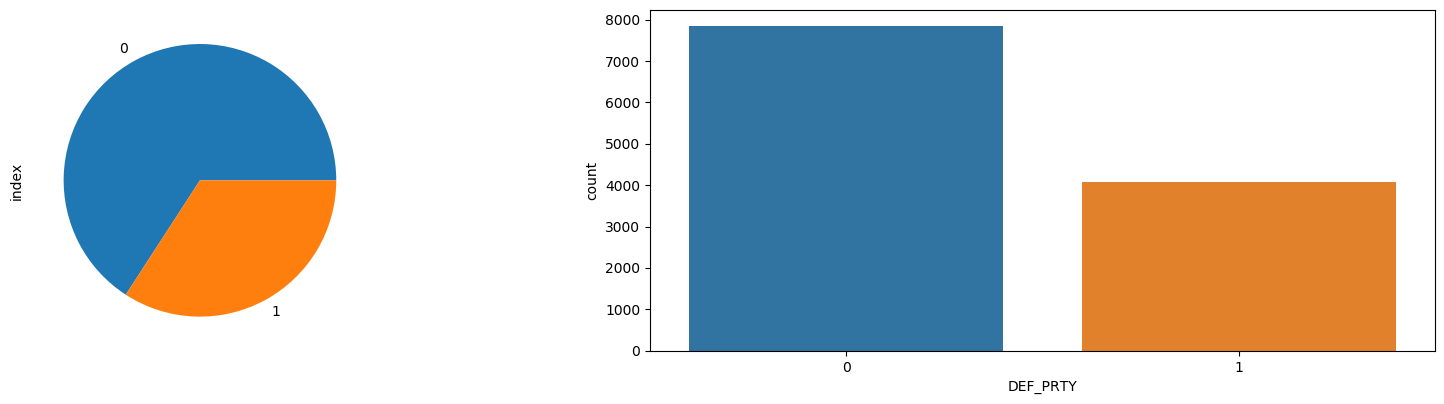

In [15]:
print("Number of RED tage:", len(data.loc[RED]),'\n')
print("Number of YEL tage:", len(data.loc[~RED]))
fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()
data.groupby('DEF_PRTY').count()['index'].plot(kind='pie',ax = axes[0])
sns.countplot(x = data['DEF_PRTY'])

In [16]:
# test = pd.read_excel('./DatasetSample/Data/Testing.xlsx')
# for col in col_numeric:
#     test[col] = pd.to_numeric(test[col],errors='coerce')

### 2.2 Pick the features that actually work

All of the meta features have information about target as well, but some of them are not good enough such as:
- TEST_FSPD

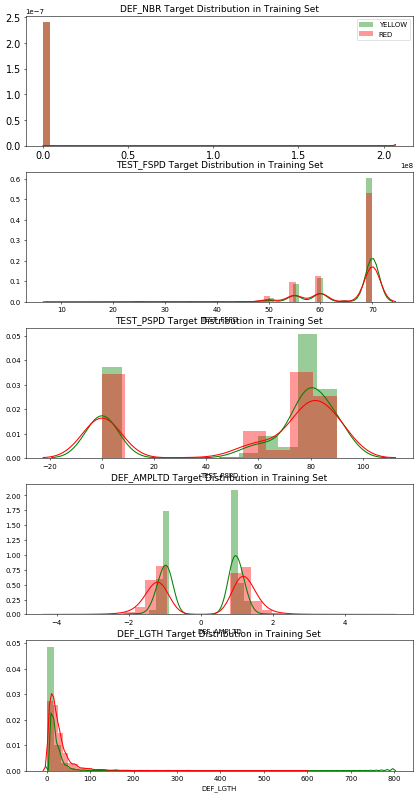

In [17]:
fig,axes = plt.subplots(ncols = 1, nrows = len(METAFEATURES),figsize = (10,20),dpi = 50)

#sns.distplot(data.loc[~RED]['TRACK_SDTK_NBR'],label = 'YEL',ax = axes[0],color='green')

for i,feature in enumerate(METAFEATURES):
    sns.distplot(data.loc[~RED][feature],label = 'YELLOW',ax = axes[i],color = 'green')
    sns.distplot(data.loc[RED][feature],label='RED',ax = axes[i],color = 'red')
    #sns.distplot(data[feature])
    axes[0].set_xlabel('')
    axes[0].tick_params(axis='x', labelsize=14)
    axes[0].tick_params(axis='y', labelsize=14)
    axes[0].legend() 
    
    axes[i].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
plt.show()
    

### 3.- Statistic Models


#### 3.1 Evenly distribute and shuffle the data

In [18]:
from sklearn.model_selection import train_test_split
#0.33 of the data is used for training, returns x & y
train,test = train_test_split(data,test_size=0.33,random_state = 42)

In [19]:
train_red = train.loc[RED]
train_yel = train.loc[~RED]
train_yel_shrunk = train_yel[:len(train_red)]
#print(len(train_red)+len(test.loc[RED]))
print(len(train_red))
train_final = pd.concat([train_red,train_yel_shrunk])
train_final = train_final.sample(frac=1)

2711


### 3.2 Single Model


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [86]:
X_col = ['TEST_PSPD','DEF_NBR','DEF_AMPLTD','DEF_LGTH']
Y_col = 'DEF_PRTY'

train_x,test_x = train_final[X_col],test[X_col]
print("Shape of training data:",train_x.shape)

train_y,test_y = train_final[Y_col],test[Y_col]
print("Shape of test data:",test_y.shape)
X = train_x.to_numpy()
Y = train_y.to_numpy()

Shape of training data: (5422, 4)
Shape of test data: (3930,)


### SVM

In [88]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
clf.fit(X, Y)
f1_score(test_y,clf.predict(test_x),average = None)


array([0.88568608, 0.79284436])

### Decision Tree (Accuracy > 90%)

In [22]:
clf_tree = DecisionTreeClassifier(random_state = 0)
clf_tree.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [48]:
# F1 scores
f1_score(test_y,clf_tree.predict(test_x),average = None)


array([0.97432883, 0.95248458])

### Logistic Regression (Not recommended)

In [25]:
clf_log = LogisticRegression()
clf_log.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 3.3 Ensemble Models

#### Random Forest Regression ( ~90%)

In [27]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=8, random_state=0)
regr.fit(X,Y)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

#### *** Bagging meta-estimator

In ensemble algorithms, baggind methods form a class of algorithms which build several instances of a black-box estimator on random subsets of the original training set and then aggregate their individual predictions to form a final prediction
- Reduce the variance of a base estimator
- Reduce overfitting
- works well on complex model

After using bagging method on Decision tree classifier, the accuracy increaced one percent.

In [29]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(DecisionTreeClassifier(),n_estimators=12,
                             max_samples=0.2, max_features=4)
bagging.fit(X,Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [47]:
f1_score(test_y,bagging.predict(test_x),average = None)

array([0.97831608, 0.95950383])

#### Voting ensemble for classification

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms

In [31]:
from sklearn.ensemble import VotingClassifier

In [92]:
estimators = [
              ("Decision tree",DecisionTreeClassifier()),
             ("SVC",clf)
             ]
Voting = VotingClassifier(estimators)
Voting.fit(X,Y)


VotingClassifier(estimators=[('Decision tree',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_stat

In [93]:
f1_score(test_y,Voting.predict(test_x),average = None)

array([0.9388516 , 0.86858974])

#### Computing accuracy 



In [94]:
from sklearn.metrics import accuracy_score

models = {"SVC":clf,"Random forest":regr, "Decision Tree":clf_tree,
          "bagging":bagging, "Voting":Voting}
for k,v in models.items():
    print("The cross-validation score of" ,k, "is:")
    print(cross_val_score(v, train_x, train_y, cv=5).mean(),"\n")
    
    #print(accuracy_score(test_y, v.predict(test_x)))
    if k == "Random forest":
        continue
    print("The accuracy-score score of" ,k, "is:")
    print(accuracy_score(test_y,v.predict(test_x)),"\n")
    

The cross-validation score of SVC is:
0.8371442175251247 

The accuracy-score score of SVC is:
0.8526717557251908 

The cross-validation score of Random forest is:
0.9230499751621991 

The cross-validation score of Decision Tree is:
0.9688300712500213 

The accuracy-score score of Decision Tree is:
0.9666666666666667 

The cross-validation score of bagging is:
0.9739959528627544 

The accuracy-score score of bagging is:
0.9717557251908397 

The cross-validation score of Voting is:
0.8838054993453162 

The accuracy-score score of Voting is:
0.9165394402035624 

